In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_original = pd.read_csv('../Data/processed/processed_Airbnb_Open_Data.csv')
df = df_original.copy()

### Preço médio por grupo de bairros.
A variação entre os bairros é relativamente pequena (entre ~623 e ~630). Isso sugere uma distribuição de preços mais homogênea do que o esperado, também pode indicar a necessidade de uma análise mais profunda com filtros adicionais (como tipo de imóvel, número de hóspedes, etc).

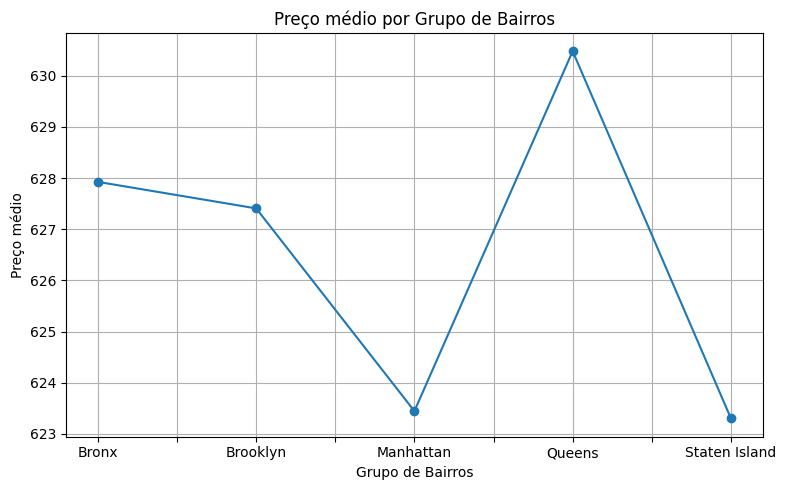

In [5]:
df.groupby('neighbourhood_group')['price'].mean().plot(kind ='line', marker = 'o', figsize= (8,5))
plt.title('Preço médio por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Preço médio')
plt.grid(True)
plt.tight_layout()
plt.show()

### Preço médio de Taxa de serviço por grupo de bairros.
Há pouca variação no valor médio de taxa de serviço cobrada. Os valores ficam entre ~124 e ~126.

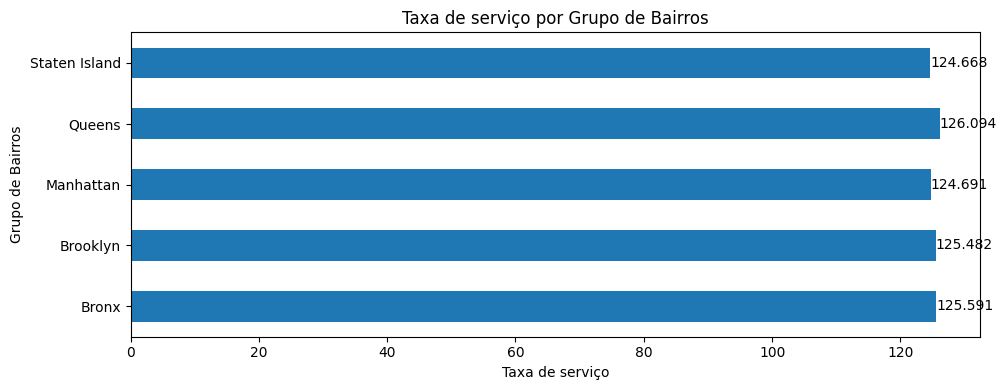

In [6]:
ax = df.groupby('neighbourhood_group')['service_fee'].mean().plot(kind='barh', figsize=(10,4))
plt.title('Taxa de serviço por Grupo de Bairros')
plt.xlabel('Taxa de serviço')
plt.ylabel('Grupo de Bairros')
plt.tight_layout()
ax.bar_label(ax.containers[0])
plt.show()

### Distribuição por politica de Cancelamento.
Os dados nos mostram uma distribuição extremamente equilibrada entre as 3 categorias. Essa distribuição sugere que os anfitrioes em NY não possuem uma preferencia clara sobre esse item. 

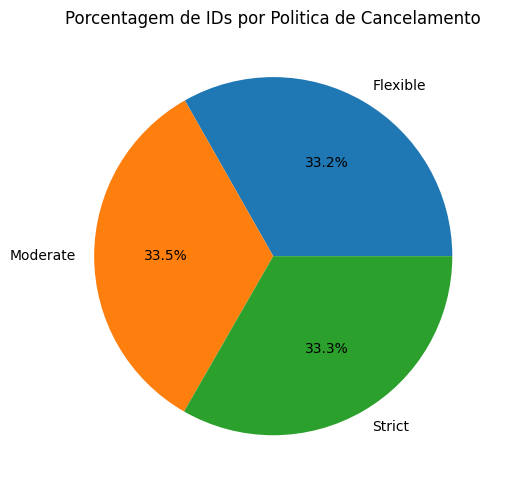

In [7]:
df.groupby('cancellation_policy')['id'].count().plot(kind='pie', figsize=(8,5), autopct='%1.1f%%')
plt.title('Porcentagem de IDs por Politica de Cancelamento')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Quantidade de anuncios por verificação de identidade dos anfitriões.
Existe indiferença significativa entre o número de Verificados e Não Verificados. 
Isso indica uma baixa exigência de verificação por parte da plataforma ou uma preferencia dos anfitrioes em manter o anonimato. Isso pode gerar uma falta de credibilidade e menor confiança dos usuarios no momento de firmar acordo.

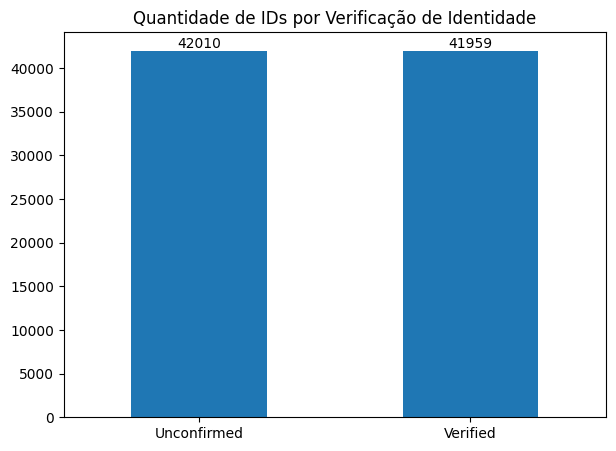

In [8]:
ax = df.groupby('host_identity_verified')['id'].count().plot(kind= 'bar', figsize=(7,5))
plt.title('Quantidade de IDs por Verificação de Identidade')
plt.xlabel('')
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0])
plt.show()

### Quantidade de anuncios com base na data de ultima avaliação.
 - 2019 houve um pico no número de anuncios ativos, indicando um possivel auge na popularidade do airbnb em NY.
 - 2020 houve uma queda notavel, possivelmente relacionado ao COVID-19 e as restrições de viagens.
 - 2021 - 2022 Podemos observar uma recuperação gradual do numero de anuncios em NY.
 - 2024 Apenas 1 anuncio aparece, indicando dados incompletos nesse ano.

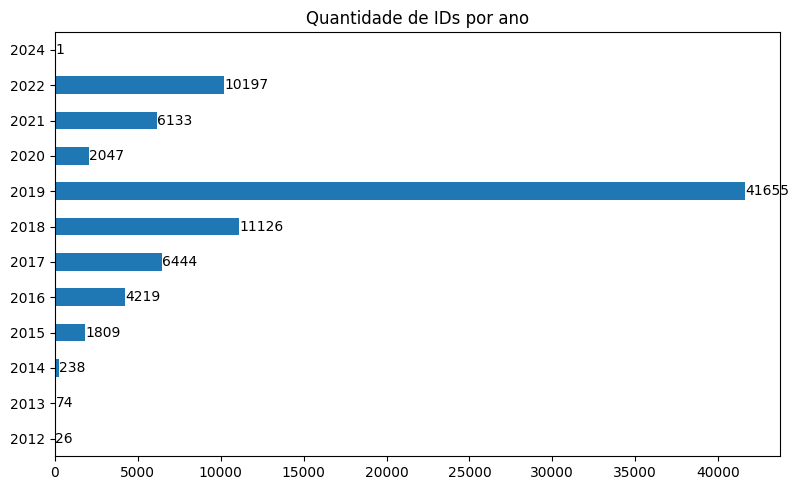

In [9]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['year'] = df['last_review'].dt.year

ax = df.groupby('year')['id'].count().plot(kind='barh', figsize=(8,5))
plt.title('Quantidade de IDs por ano')
plt.ylabel('')
plt.tight_layout()
ax.bar_label(ax.containers[0])
plt.show()